# LAB 2

In [372]:
import numpy as np
import cv2  # pip install
import glob
import matplotlib.pyplot as plt # pip install

In [373]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
    # print(path)
    image = cv2.imread(path)
    filename = path.split("/")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

venom.jpg
ironman.jpg
wolverine.jpg
wonderwoman.jpg
hulk.jpg
magnetto.jpg
wonderwoman2.jpg
spiderman.jpg


# HOMEWORK

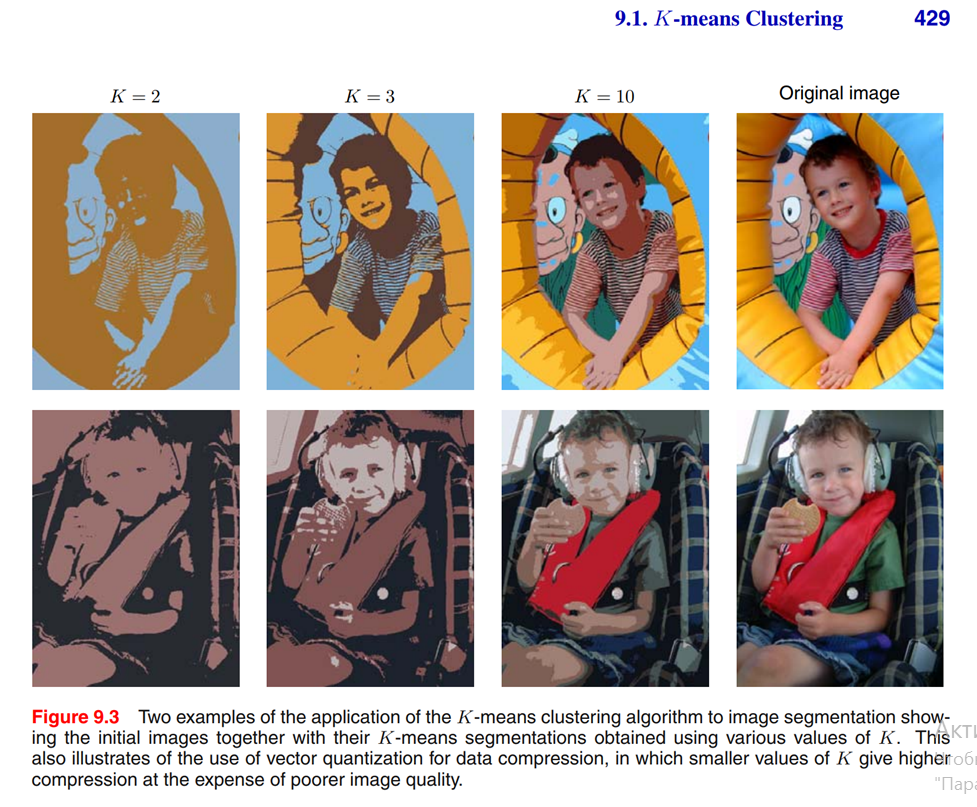

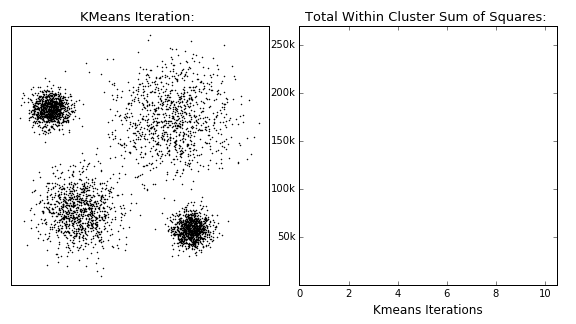

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [374]:
class KMeans():
    def __init__(self, k, iteration_count):
        self.k = k # Amount of classes
        self.iteration_count = iteration_count

    def fit(self, data):
        self.data = data
        self.centroits = self.centroid_init()
        self.points_centroids = np.zeros(len(data))

        for _ in range(self.iteration_count):
            for i in range(len(self.data)):
                point = data[i]
                closest_centroid = self.get_closest_centroid(point)
                self.points_centroids[i] = closest_centroid

            for c in range(len(self.centroits)):
                self.centroits[c] = self.data[self.points_centroids == c].mean(axis=0)

    def get_closest_centroid(self, point):
        distances = self.get_distance(point)
        return np.argmin(distances)

    def get_distance(self, point):
        return np.sqrt(((point - self.centroits)**2).sum(axis=1))

    def centroid_init(self):
        centroids = self.data.copy()
        np.random.shuffle(centroids)
        return centroids[:self.k]

    def classify(self,x):
        return self.centroits[self.get_closest_centroid(x)]

In [375]:
# Input data
data = [images["hulk.jpg"].reshape((-1,3)) for k in images.keys()]

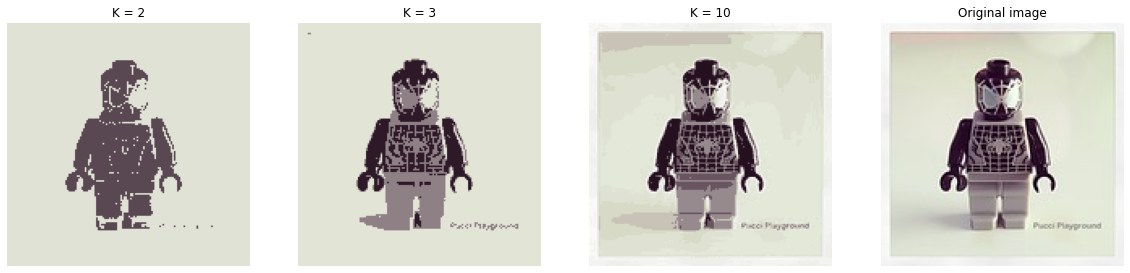

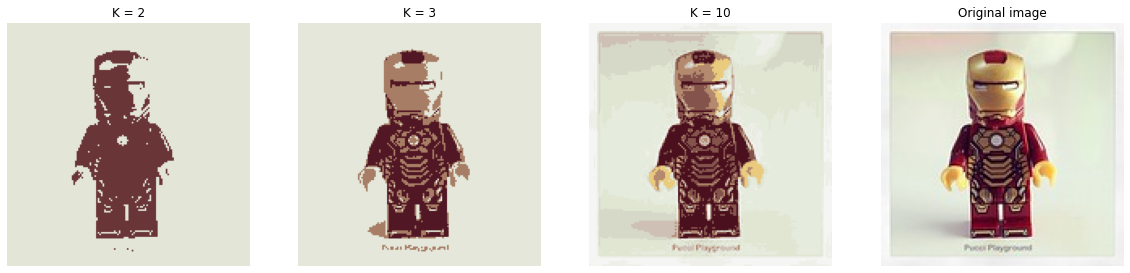

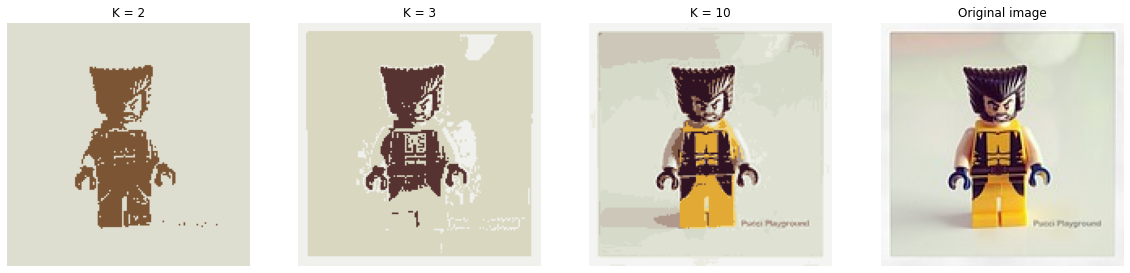

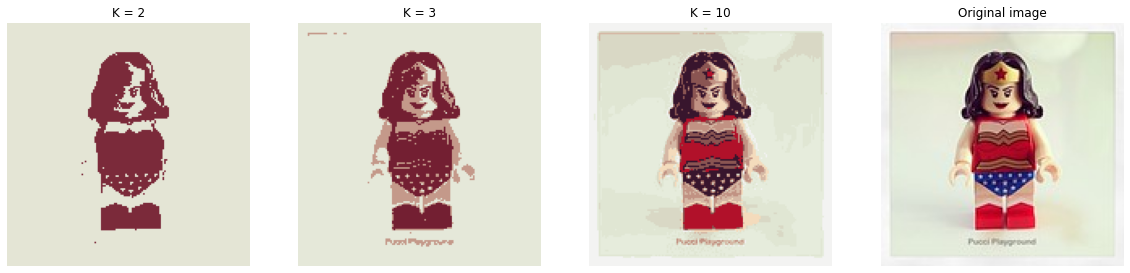

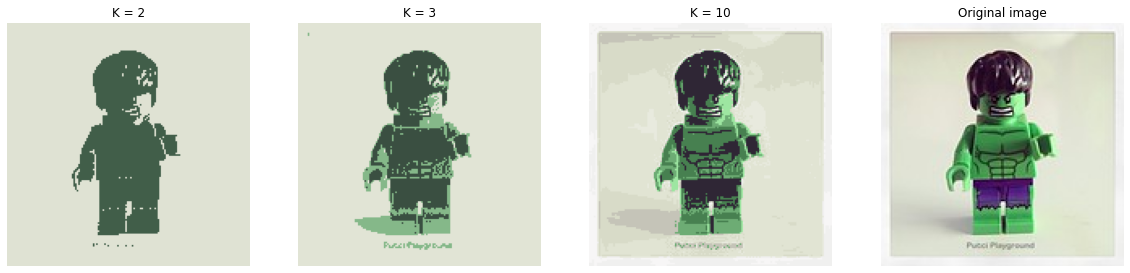

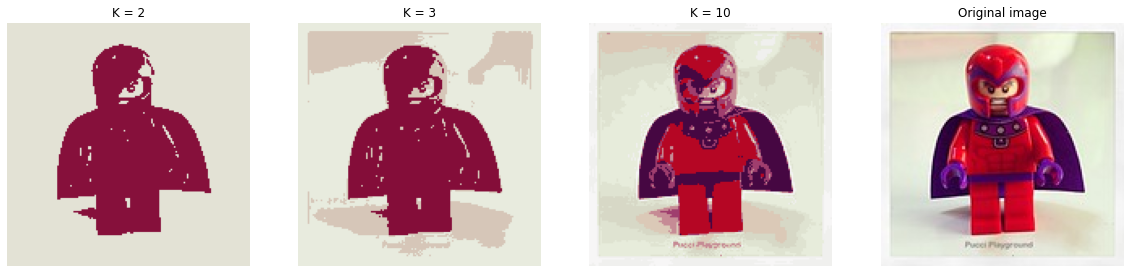

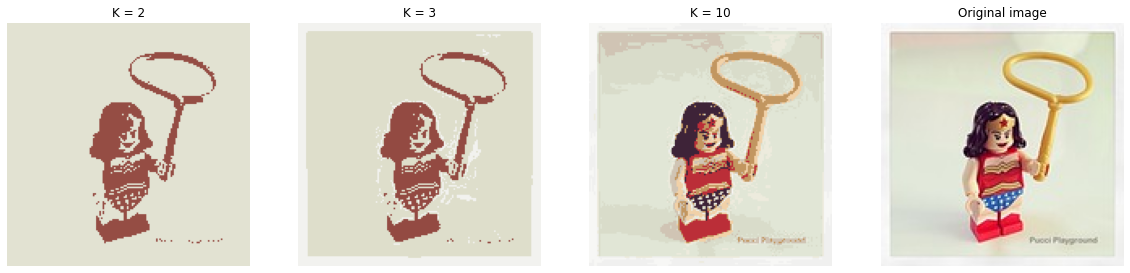

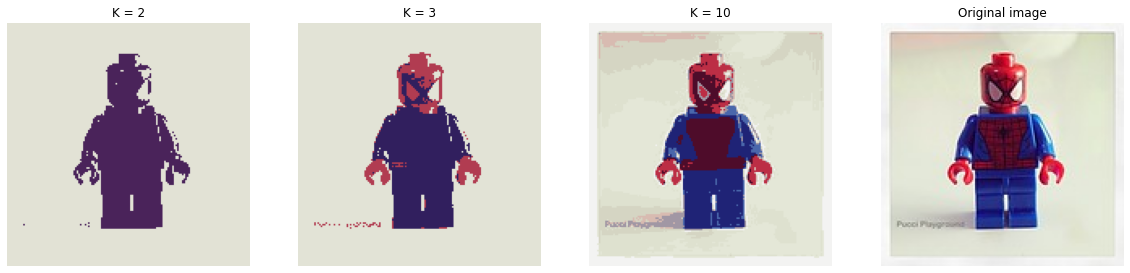

In [376]:
# Visualize the result image
# Put your code here

K = [2, 3, 10]
for k in images.keys():
    raw_image = images[k]
    img = raw_image.reshape((-1,3))
    segmented = []

    for c in K:
        kmeans = KMeans(c, 20)
        kmeans.fit(np.float64(img))

        result = np.array([kmeans.classify(point) for point in img])

        result = np.uint8(result)
        result_image = result.reshape(raw_image.shape)
        segmented.append(result_image)

    plt.figure(figsize=(20, 20))
    for resImgindex in range(1, len(segmented) + 1):
        plt.subplot(1, len(K) + 1, resImgindex)
        plt.imshow(segmented[resImgindex - 1])
        plt.title('K = %i' % K[resImgindex - 1])
        plt.axis("off")

    plt.subplot(1,len(K) + 1, len(K) + 1)
    plt.imshow(raw_image)
    plt.title('Original image')
    plt.axis("off")
    plt.show()